In [18]:
import numpy as np
import pandas as pd
import random
import keras
#from sklearn.metrics import f1_score
#from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.layers.normalization import BatchNormalization
from keras.initializers import Initializer
from keras import regularizers
from keras import backend as K


In [19]:
raw_data = pd.read_csv('.//ordered_molecules_with_target.csv')

In [20]:
x_train, x_test, y_train, y_test = train_test_split(raw_data[["px","py","pz","ax","ay","az"]], 
                                                    raw_data[["t_px","t_py","t_pz","t_ax","t_ay","t_az"]], 
                                                    test_size = 0.3, random_state = 10)

In [21]:
#model 1
model_1 = Sequential()

model_1.add(Dense(20, input_dim=6, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.1)))
model_1.add(Dense(20, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.1)))
model_1.add(Dense(20, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.1)))
model_1.add(Dense(6, activation='linear', kernel_initializer = 'glorot_normal', kernel_regularizer = regularizers.l2(0.1)))

In [22]:
model_1.compile(loss='mean_squared_error', optimizer= "rmsprop", metrics=['mse'])

In [37]:
hist_1 = model_1.fit(x_train.values, y_train.values, epochs=1000, batch_size=100, validation_data = (x_test.values,y_test.values),
                    verbose = 2)

Train on 179200 samples, validate on 76800 samples
Epoch 1/1000
3s - loss: 2.4344 - mean_squared_error: 0.1139 - val_loss: 2.4455 - val_mean_squared_error: 0.1227
Epoch 2/1000
3s - loss: 2.4342 - mean_squared_error: 0.1138 - val_loss: 2.4437 - val_mean_squared_error: 0.1217
Epoch 3/1000
3s - loss: 2.4344 - mean_squared_error: 0.1140 - val_loss: 2.4518 - val_mean_squared_error: 0.1307
Epoch 4/1000
2s - loss: 2.4344 - mean_squared_error: 0.1139 - val_loss: 2.4244 - val_mean_squared_error: 0.1033
Epoch 5/1000
3s - loss: 2.4343 - mean_squared_error: 0.1138 - val_loss: 2.4225 - val_mean_squared_error: 0.0988
Epoch 6/1000
2s - loss: 2.4343 - mean_squared_error: 0.1138 - val_loss: 2.4259 - val_mean_squared_error: 0.1030
Epoch 7/1000
2s - loss: 2.4343 - mean_squared_error: 0.1139 - val_loss: 2.4318 - val_mean_squared_error: 0.1095
Epoch 8/1000
2s - loss: 2.4343 - mean_squared_error: 0.1138 - val_loss: 2.4439 - val_mean_squared_error: 0.1235
Epoch 9/1000
2s - loss: 2.4343 - mean_squared_error: 

In [38]:
y_pred = model_1.predict(x_test.values)

In [39]:
mse = mean_squared_error(y_test.values, y_pred)
rmse = np.sqrt(mse)
mae_metric = mean_absolute_error(y_test.values, y_pred)
r2_error = r2_score(y_test.values, y_pred)

In [40]:
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae_metric)
print("R2_Score:", r2_error)

MSE:  0.101001746366
RMSE:  0.317807719173
MAP:  0.185327505156
R2_Score: 0.990546863925


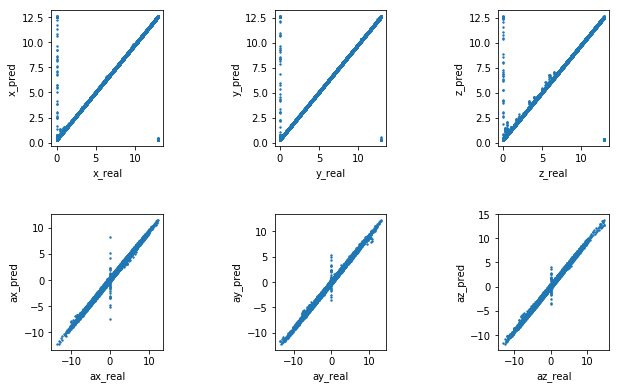

In [41]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

ax1.scatter(y_test.values[:,0], y_pred[:,0], s= 2)
ax1.set_xlabel('x_real')
ax1.set_ylabel('x_pred')
ax2.scatter(y_test.values[:,1], y_pred[:,1], s= 2)
ax2.set_xlabel('y_real')
ax2.set_ylabel('y_pred')
ax3.scatter(y_test.values[:,2], y_pred[:,2], s= 2)
ax3.set_xlabel('z_real')
ax3.set_ylabel('z_pred')
ax4.scatter(y_test.values[:,3], y_pred[:,3], s= 2)
ax4.set_xlabel('ax_real')
ax4.set_ylabel('ax_pred')
ax5.scatter(y_test.values[:,4], y_pred[:,4], s= 2)
ax5.set_xlabel('ay_real')
ax5.set_ylabel('ay_pred')
ax6.scatter(y_test.values[:,5], y_pred[:,5], s= 2)
ax6.set_xlabel('az_real')
ax6.set_ylabel('az_pred')

plt.subplots_adjust(wspace = 1, hspace = 0.5)
plt.show()

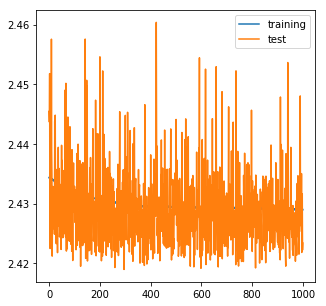

In [42]:
fig_2 = plt.figure(figsize=(5,5))

myax1 = fig_2.add_subplot(1,1,1)

myax1.plot(hist_1.history['loss'], label='training')
myax1.plot(hist_1.history['val_loss'], label='test')
myax1.legend()

plt.show()